In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Pauli, SparsePauliOp
from qiskit.primitives import StatevectorEstimator, StatevectorSampler
from qiskit.visualization import plot_histogram

import numpy as np

# QSP signal loading & Designing QSVT circuit

In [53]:
# beta = 5, degree = 102, epsilon=0 (짝수 degree이여야 함)
phase_str_input = """0.785772127121113
-0.000425226972078656
0.000476461808984088
-0.000529414058214937
0.000581359183656461
-0.000634981799775448
0.000688038659967571
-0.000743409083150673
0.000798909581802633
-0.000857430821584228
0.000916792362536284
-0.000979895746957432
0.00104458496363608
-0.00111380140558094
0.00118544516364086
-0.00126253088683332
0.00134305049244090
-0.00143013114457892
0.00152190092498953
-0.00162165075819057
0.00172770522741767
-0.00184359111765438
0.00196791672443003
-0.00210455128822130
0.00225251834180526
-0.00241619332269503
0.00259522065420298
-0.00279474257487214
0.00301535769915258
-0.00326340548755474
0.00354100033060951
-0.00385641971450536
0.00421428263256035
-0.00462614140881001
0.00510095205622573
-0.00565609151287366
0.00630845942749262
-0.00708645103933205
0.00802253693719754
-0.00916757500861107
0.0105871862658025
-0.0123823922003407
0.0146968241541342
-0.0177564127700781
0.0219108464822945
-0.0277353328777014
0.0361813550452377
-0.0488450708608460
0.0682274774954872
-0.0972753892058450
0.134998009697666
-0.162161066565843
0.134998009697666
-0.0972753892058450
0.0682274774954872
-0.0488450708608460
0.0361813550452377
-0.0277353328777014
0.0219108464822945
-0.0177564127700781
0.0146968241541342
-0.0123823922003407
0.0105871862658025
-0.00916757500861107
0.00802253693719754
-0.00708645103933205
0.00630845942749262
-0.00565609151287366
0.00510095205622573
-0.00462614140881001
0.00421428263256035
-0.00385641971450536
0.00354100033060951
-0.00326340548755474
0.00301535769915258
-0.00279474257487214
0.00259522065420298
-0.00241619332269503
0.00225251834180526
-0.00210455128822130
0.00196791672443003
-0.00184359111765438
0.00172770522741767
-0.00162165075819057
0.00152190092498953
-0.00143013114457892
0.00134305049244090
-0.00126253088683332
0.00118544516364086
-0.00111380140558094
0.00104458496363608
-0.000979895746957432
0.000916792362536284
-0.000857430821584228
0.000798909581802633
-0.000743409083150673
0.000688038659967571
-0.000634981799775448
0.000581359183656461
-0.000529414058214937
0.000476461808984088
-0.000425226972078656
0.785772127121113"""

In [54]:
# beta = 5, degree = 32, epsilon=0 (짝수 degree이여야 함)
phase_str_input = """0.782025791265972
0.00412392108795260
-0.00498502655642925
0.00600565017853955
-0.00720661567980189
0.00867792986043325
-0.0104936520333378
0.0128222614633125
-0.0158616608172589
0.0199843070182096
-0.0257343944384533
0.0340822431900313
-0.0465886408453450
0.0657718119804017
-0.0945570241836318
0.132032749378600
-0.159074754567499
0.132032749378600
-0.0945570241836318
0.0657718119804017
-0.0465886408453450
0.0340822431900313
-0.0257343944384533
0.0199843070182096
-0.0158616608172589
0.0128222614633125
-0.0104936520333378
0.00867792986043325
-0.00720661567980189
0.00600565017853955
-0.00498502655642925
0.00412392108795260
0.782025791265972"""

In [55]:
phase_list = np.array([float(line.strip()) for line in phase_str_input.strip().splitlines() if line.strip()])

print(phase_list)
print(f"총 {len(phase_list)}개 숫자")

[ 0.78202579  0.00412392 -0.00498503  0.00600565 -0.00720662  0.00867793
 -0.01049365  0.01282226 -0.01586166  0.01998431 -0.02573439  0.03408224
 -0.04658864  0.06577181 -0.09455702  0.13203275 -0.15907475  0.13203275
 -0.09455702  0.06577181 -0.04658864  0.03408224 -0.02573439  0.01998431
 -0.01586166  0.01282226 -0.01049365  0.00867793 -0.00720662  0.00600565
 -0.00498503  0.00412392  0.78202579]
총 33개 숫자


In [56]:
def wx_to_reflection_angle(phases):
   
    d = len(phases) - 1
    
    result = [0 for i in range(d)]
    result[0] = phases[0] + phases[d] + (d-1)*(np.pi/2)
    for i in range(1, d):
        result[i] = phases[i] - np.pi/2
    return result

phase_list = wx_to_reflection_angle(phase_list)

# 결과 출력
print(phase_list)
print(f"총 {len(phase_list)}개 숫자")

[np.float64(50.25873771317374), np.float64(-1.5666724057069439), np.float64(-1.5757813533513259), np.float64(-1.564790676616357), np.float64(-1.5780029424746984), np.float64(-1.5621183969344634), np.float64(-1.5812899788282344), np.float64(-1.5579740653315841), np.float64(-1.5866579876121554), np.float64(-1.550812019776687), np.float64(-1.59653072123335), np.float64(-1.5367140836048652), np.float64(-1.6173849676402416), np.float64(-1.505024514814495), np.float64(-1.6653533509785283), np.float64(-1.4387635774162966), np.float64(-1.7298710813623956), np.float64(-1.4387635774162966), np.float64(-1.6653533509785283), np.float64(-1.505024514814495), np.float64(-1.6173849676402416), np.float64(-1.5367140836048652), np.float64(-1.59653072123335), np.float64(-1.550812019776687), np.float64(-1.5866579876121554), np.float64(-1.5579740653315841), np.float64(-1.5812899788282344), np.float64(-1.5621183969344634), np.float64(-1.5780029424746984), np.float64(-1.564790676616357), np.float64(-1.5757813

In [ ]:
from qiskit.circuit.library import XGate

def real_QSVT(QSVT_m: int, phases, U_A: QuantumCircuit) -> QuantumCircuit:


    qc = QuantumCircuit(1 + U_A.num_qubits) 
    
    c_pi_not_gate = QuantumCircuit(QSVT_m + 1)
    c_pi_not_gate.compose(XGate().control(QSVT_m, ctrl_state='0'*QSVT_m), qubits=[i for i in range(1, QSVT_m+1)]+[0], inplace=True)
    
    qc.h(0) 
    
    qc.h(range(QSVT_m+1, 1+U_A.num_qubits))
    
    d = len(phases)
    for j in range(d//2):
        qc.compose(U_A, qubits=[i for i in range(1, 1 + U_A.num_qubits)], inplace=True)
        
        qc.compose(c_pi_not_gate, qubits=[i for i in range(0, QSVT_m+1)], inplace=True)
        qc.rz(2*phases[-1-2*j], 0)
        qc.compose(c_pi_not_gate, qubits=[i for i in range(0, QSVT_m+1)], inplace=True)
        
        qc.compose(U_A.inverse(), qubits=[i for i in range(1, 1 + U_A.num_qubits)], inplace=True)
        
        qc.compose(c_pi_not_gate, qubits=[i for i in range(0, QSVT_m+1)], inplace=True)
        qc.rz(2*phases[-2-2*j], 0)
        qc.compose(c_pi_not_gate, qubits=[i for i in range(0, QSVT_m+1)], inplace=True)
        
    if d%2 == 1: # if d is odd
        qc.compose(U_A, qubits=[i for i in range(1, 1 + U_A.num_qubits)], inplace=True)
        
        qc.compose(c_pi_not_gate, qubits=[i for i in range(0, QSVT_m+1)], inplace=True)
        qc.rz(2*phases[0], 0)
        qc.compose(c_pi_not_gate, qubits=[i for i in range(0, QSVT_m+1)], inplace=True)


    qc.h(0) 
    return qc

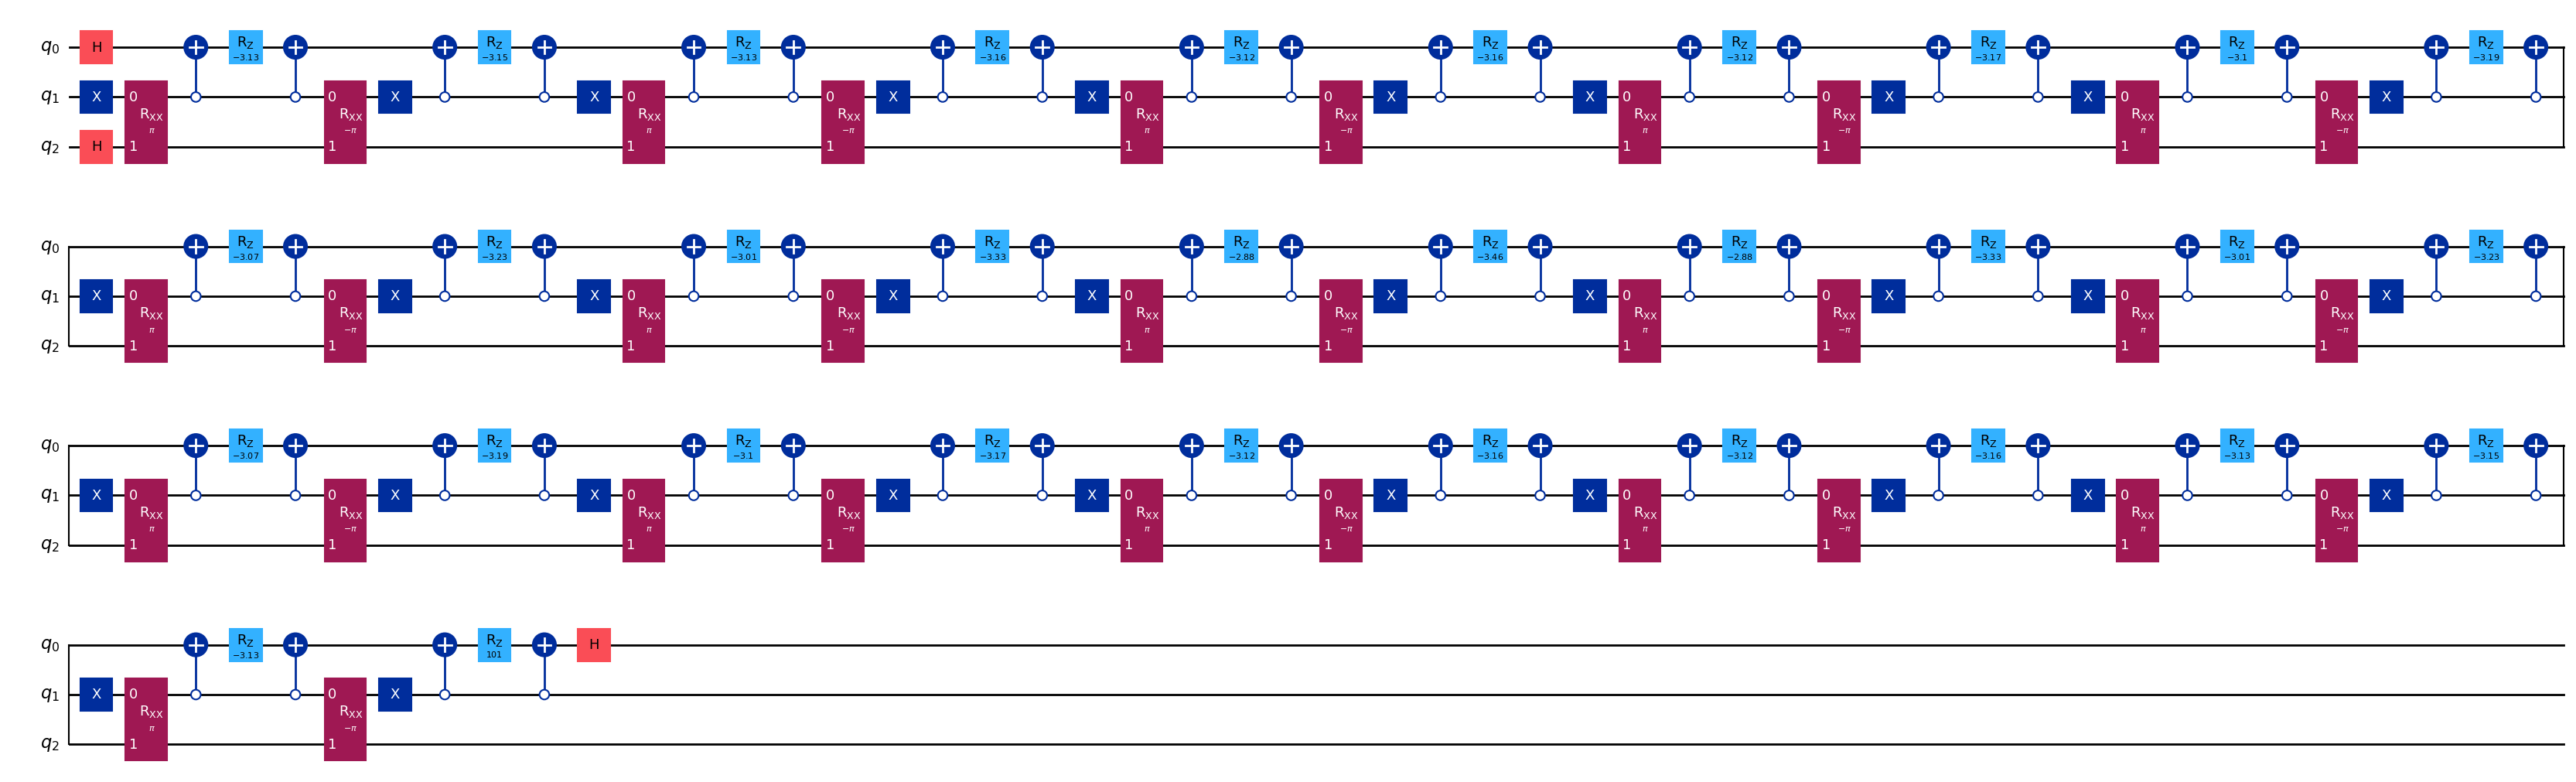

In [10]:
# Example

unitary_embedding_qc = QuantumCircuit(2)
unitary_embedding_qc.x(0)
unitary_embedding_qc.rxx(np.pi, 0, 1)

QSVT_qc = real_QSVT(1, phase_list, unitary_embedding_qc)
QSVT_qc.draw('mpl', fold=50)

# Max cut simulation을 위한 hamiltonian 제작

In [11]:
import networkx as nx

def build_maxcut_hamiltonian(graph: nx.Graph) -> SparsePauliOp:
    """
    Build the MaxCut Hamiltonian for the given graph H = (|E|/2)*I - (1/2)*Σ_{(i,j)∈E}(Z_i Z_j)
    """
    num_qubits = len(graph.nodes)
    edges = list(graph.edges())
    num_edges = len(edges)

    pauli_terms = ["I"*num_qubits] # start with identity
    coeffs = [-num_edges / 2]

    for (u, v) in edges: # for each edge, add -(1/2)*Z_i Z_j
        z_term = ["I"] * num_qubits
        z_term[u] = "Z"
        z_term[v] = "Z"
        pauli_terms.append("".join(z_term))
        coeffs.append(0.5)

    return SparsePauliOp.from_list(list(zip(pauli_terms, coeffs)))

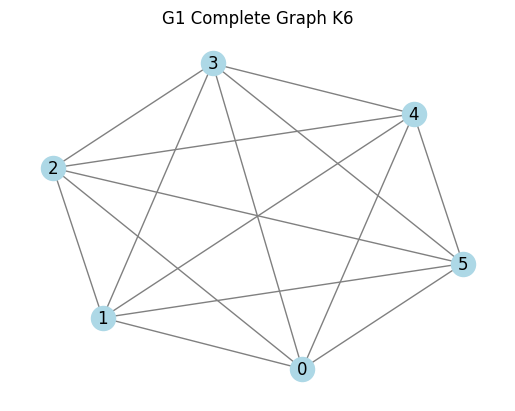

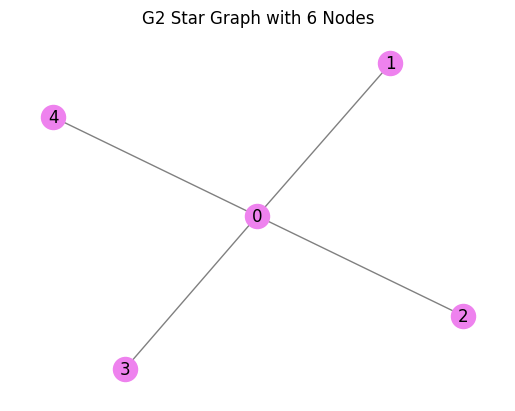

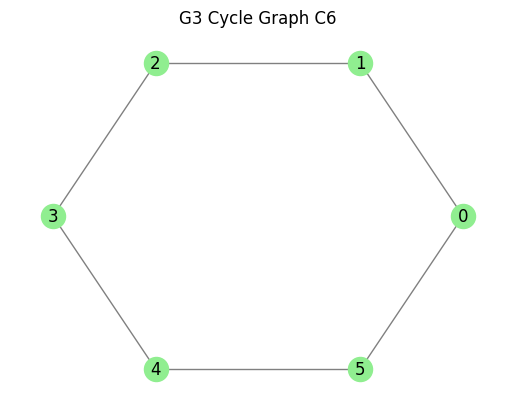

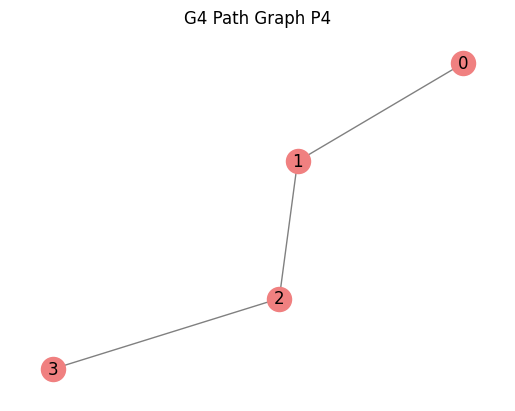

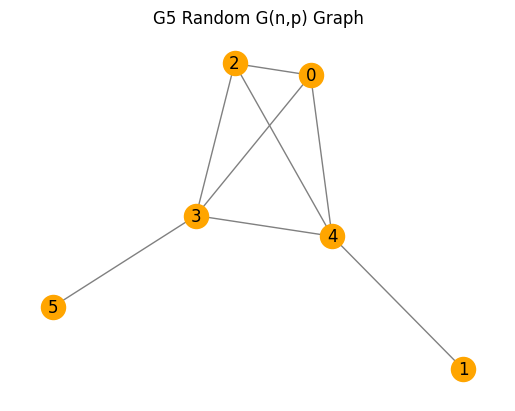

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

def complete_graph_k6():
    G = nx.complete_graph(6)
    pos = nx.spring_layout(G)
    fig, ax = plt.subplots() 
    nx.draw(G, pos, ax=ax, with_labels=True, node_color='lightblue', edge_color='gray')
    ax.set_title("G1 Complete Graph K6")
    plt.show()
    return G

def star_graph_6():
    G = nx.star_graph(4)
    pos = nx.spring_layout(G)
    fig, ax = plt.subplots()
    nx.draw(G, pos, ax=ax, with_labels=True, node_color='violet', edge_color='gray')
    ax.set_title("G2 Star Graph with 6 Nodes")
    plt.show()
    return G

def cycle_graph_c6():
    G = nx.cycle_graph(6)
    pos = nx.circular_layout(G)
    fig, ax = plt.subplots()
    nx.draw(G, pos, ax=ax, with_labels=True, node_color='lightgreen', edge_color='gray')
    ax.set_title("G3 Cycle Graph C6")
    plt.show()
    return G

def path_graph_p6():
    G = nx.path_graph(4)
    pos = nx.spring_layout(G)  # 또는 nx.shell_layout(G), nx.circular_layout(G)
    fig, ax = plt.subplots()
    nx.draw(G, pos, ax=ax, with_labels=True, node_color='lightcoral', edge_color='gray')
    ax.set_title("G4 Path Graph P4")
    plt.show()
    return G

def random_graph_gnp(n=6, p=0.4, seed=42):
    G = nx.erdos_renyi_graph(n, p, seed=seed)
    pos = nx.spring_layout(G)
    fig, ax = plt.subplots()
    nx.draw(G, pos, ax=ax, with_labels=True, node_color='orange', edge_color='gray')
    ax.set_title("G5 Random G(n,p) Graph")
    plt.show()
    return G

G1 = complete_graph_k6()
G2 = star_graph_6()
G3 = cycle_graph_c6()
G4 = path_graph_p6()
G5 = random_graph_gnp()

# QSVT 를 위한 block encoding: LCU 이용

In [ ]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit.library import XGate, YGate, ZGate
from qiskit.quantum_info import SparsePauliOp
from math import ceil, log2

def lcu_block_encoding(operator: SparsePauliOp):

    pauli_labels = operator.paulis.to_labels()
    coeffs = operator.coeffs.real

    filtered_pauli_labels = []
    filtered_coeffs = []
    for label, coeff in zip(pauli_labels, coeffs):
        if not np.isclose(coeff, 0):
            filtered_pauli_labels.append(label)
            filtered_coeffs.append(coeff)
    
    num_terms = len(filtered_coeffs)
    num_qubits = operator.num_qubits

    if num_terms == 0:
        raise ValueError("Operator has no terms with non-zero coefficients.")
    
    lam = np.sum(np.abs(filtered_coeffs))
    ancilla_bits = ceil(log2(num_terms)) if num_terms > 1 else 0 
    
    if ancilla_bits > 0:
        anc = QuantumRegister(ancilla_bits, name='a')
        data = QuantumRegister(num_qubits, name='q')
        circuit = QuantumCircuit(anc, data)
        ancilla_qubits_list = anc[:]
    else:
        data = QuantumRegister(num_qubits, name='q')
        circuit = QuantumCircuit(data)
        ancilla_qubits_list = []


    if ancilla_bits > 0:
        prepare_vector = np.zeros(2**ancilla_bits, dtype=complex)
        normalized_amplitudes = np.sqrt(np.abs(filtered_coeffs) / lam)
        for i in range(num_terms):
            prepare_vector[i] = normalized_amplitudes[i]
            if filtered_coeffs[i] < 0:
                prepare_vector[i] *= -1
        

        prepare_circuit = QuantumCircuit(ancilla_bits, name='PREPARE')
        prepare_circuit.prepare_state(prepare_vector, range(ancilla_bits))
        

        prepare_gate = prepare_circuit.to_gate()
        
        circuit.append(prepare_gate, anc)
        circuit.barrier()


    for idx, pauli_label in enumerate(filtered_pauli_labels):
        ctrl_state = format(idx, f'0{ancilla_bits}b') if ancilla_bits > 0 else None

        for qubit_idx, p in enumerate(reversed(pauli_label)):
            if p == 'I':
                continue

            if p == 'X':
                base_gate = XGate()
            elif p == 'Y':
                base_gate = YGate()
            elif p == 'Z':
                base_gate = ZGate()
            else:
                raise ValueError(f"알 수 없는 파울리 연산자: {p}")

            if ancilla_bits > 0:
                controlled_gate = base_gate.control(num_ctrl_qubits=ancilla_bits, ctrl_state=ctrl_state)
                circuit.append(controlled_gate, ancilla_qubits_list + [data[qubit_idx]])
            else:
                circuit.append(base_gate, [data[qubit_idx]])
    
    circuit.barrier()


    if ancilla_bits > 0:
        circuit.append(prepare_gate.inverse(), anc)

    return circuit, lam, ancilla_bits


In [14]:
qc, lam, ancilla_bits = lcu_block_encoding(build_maxcut_hamiltonian(G4))

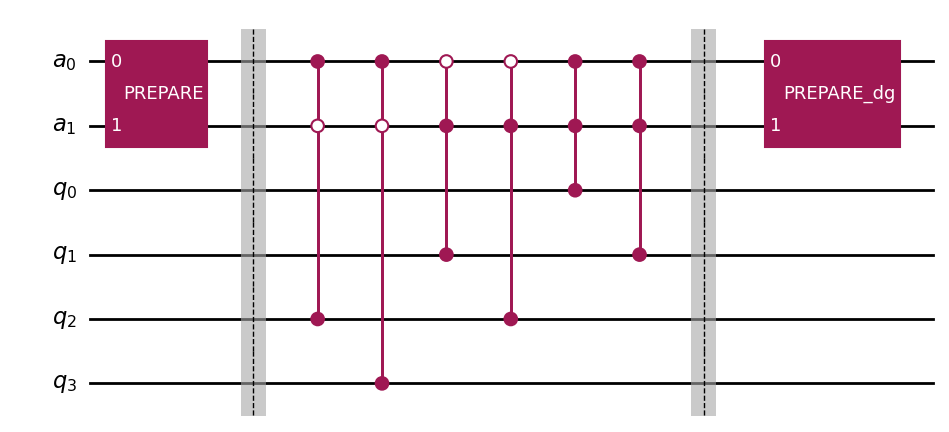

In [15]:
qc.draw('mpl')

# QSVT 구현

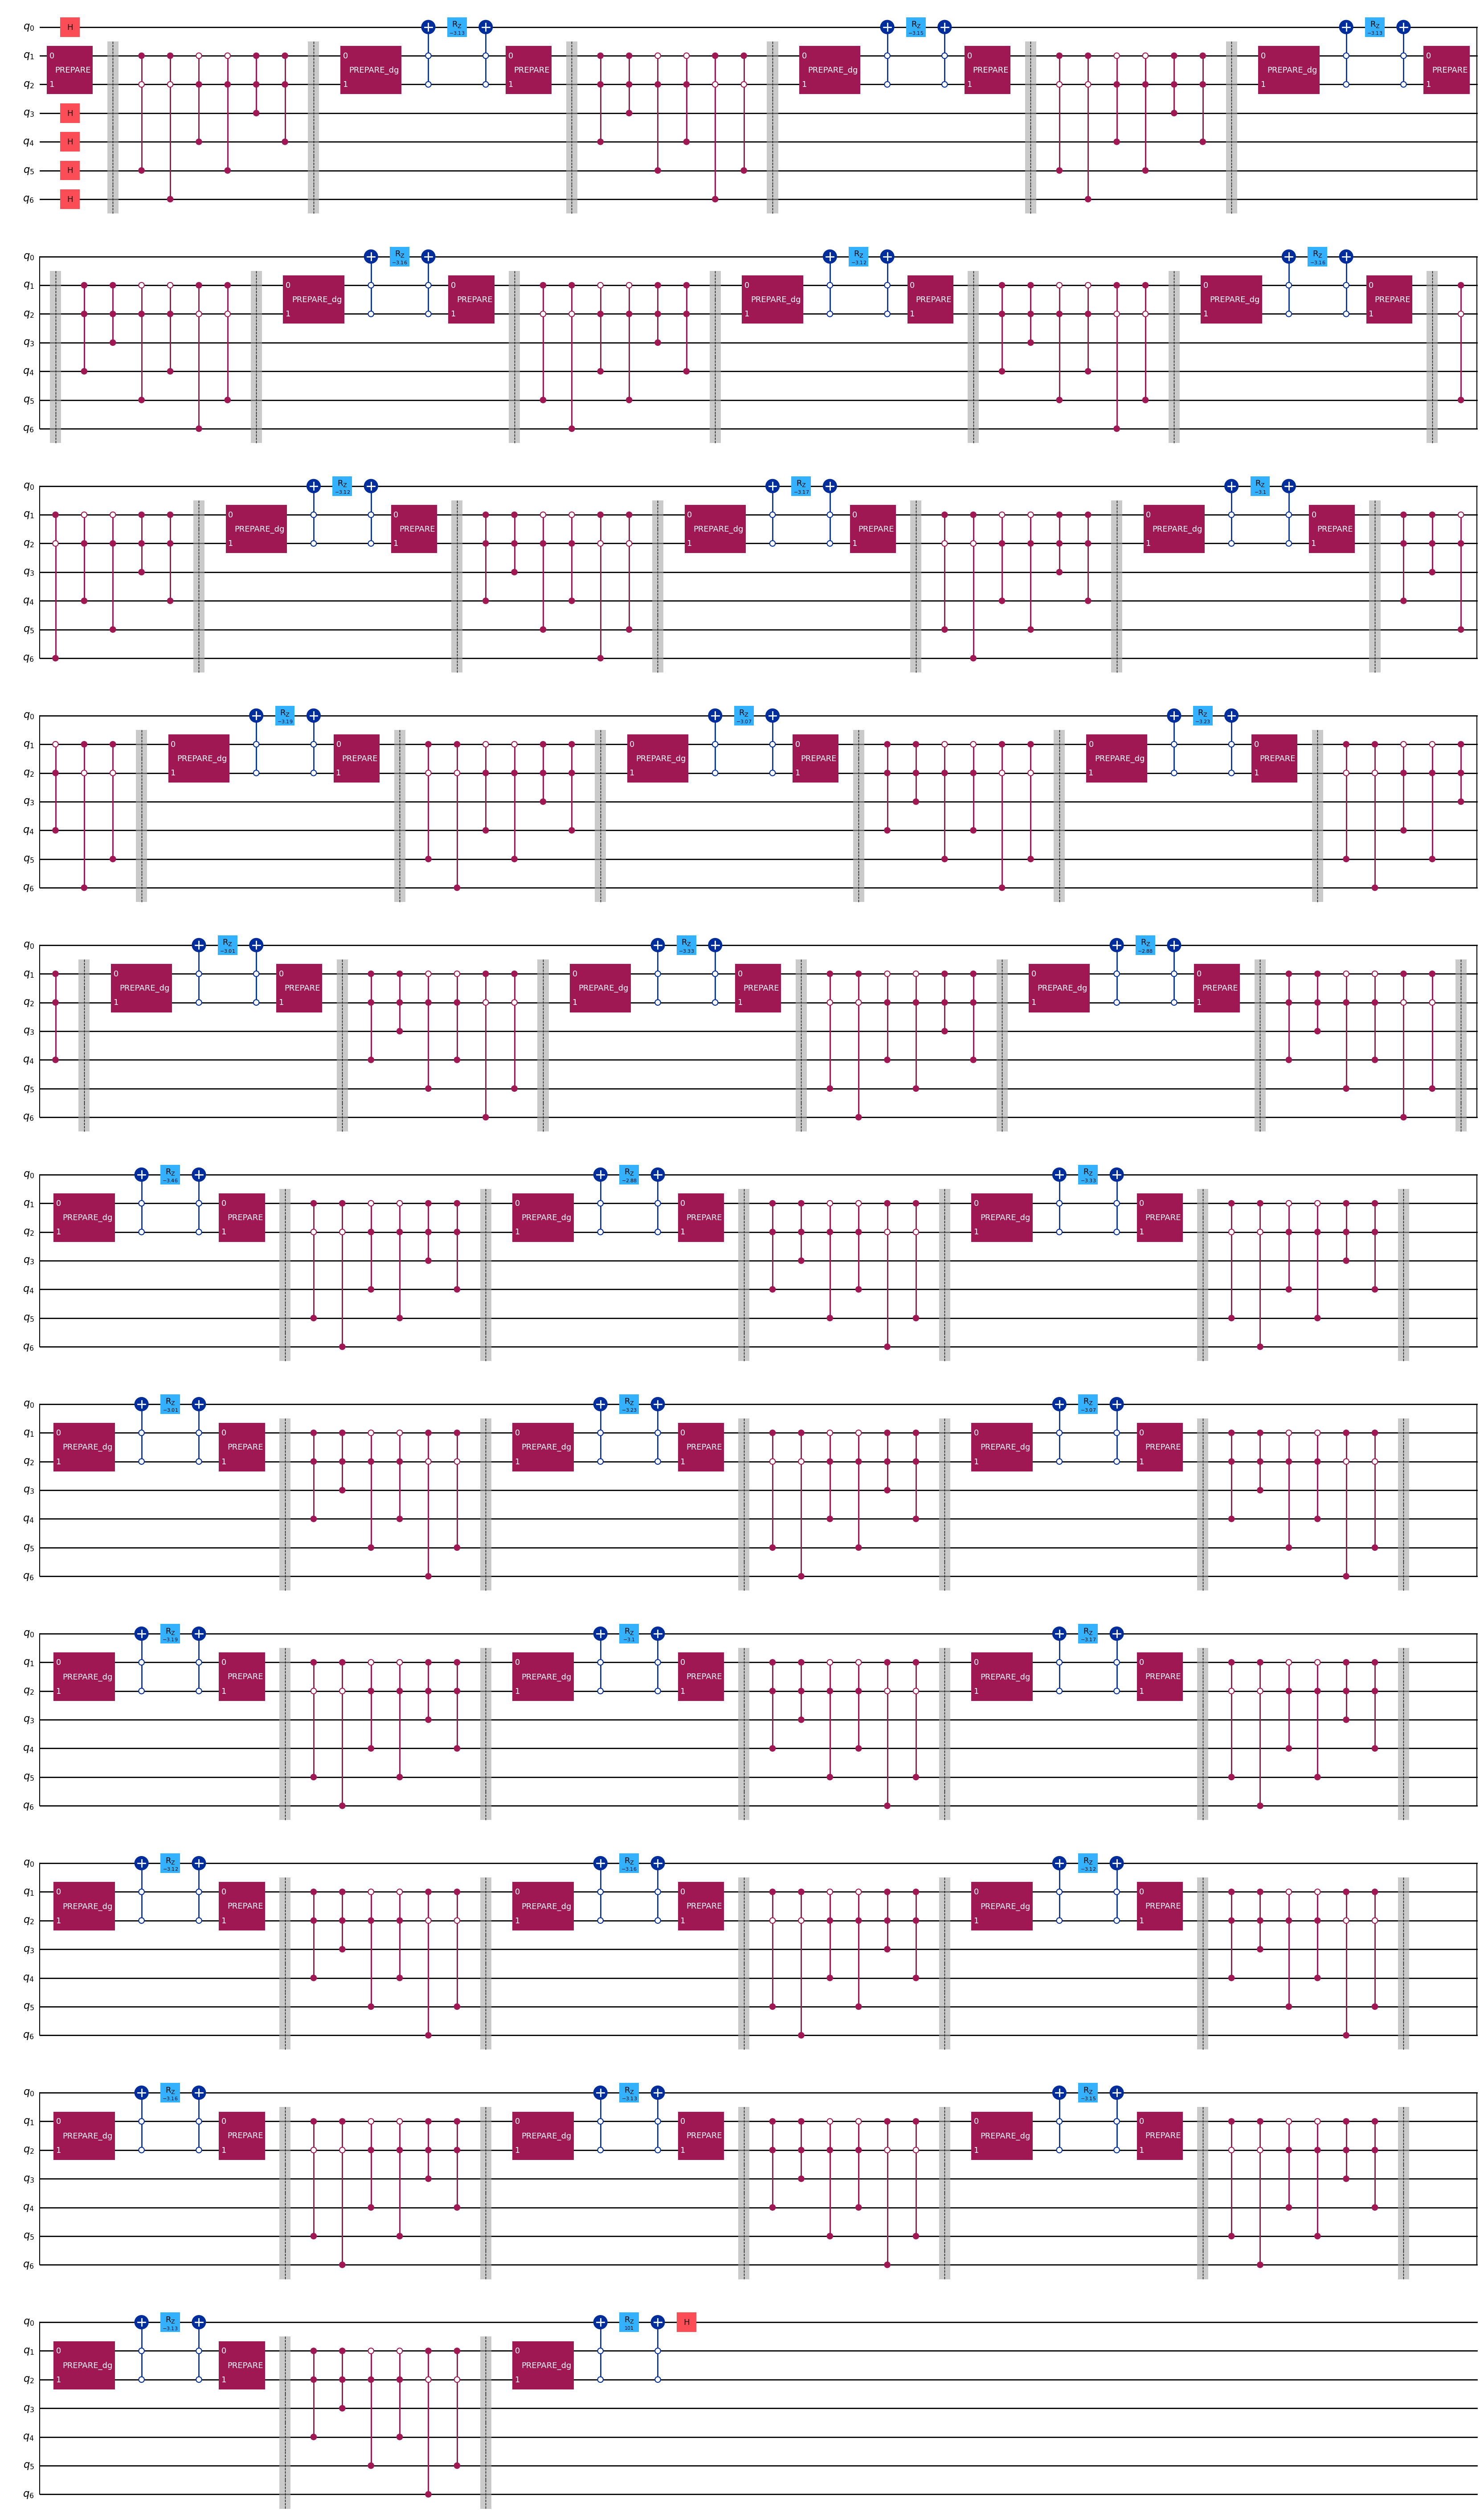

In [16]:
QSVT_qc = real_QSVT(ancilla_bits, phase_list, qc)
QSVT_qc.draw('mpl', fold=50)

In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Pauli, SparsePauliOp
from qiskit.primitives import StatevectorEstimator, StatevectorSampler
from qiskit.visualization import plot_histogram

import numpy as np

{'1010000': 51651, '0101000': 52099, '0110000': 2003, '1101000': 1987, '1001000': 2072, '0100000': 1990, '0010000': 2039, '1011000': 2022, '1000000': 55, '1110000': 59, '0111000': 76, '0011000': 62, '0001000': 70, '1100000': 79, '0000000': 8, '1111000': 4}


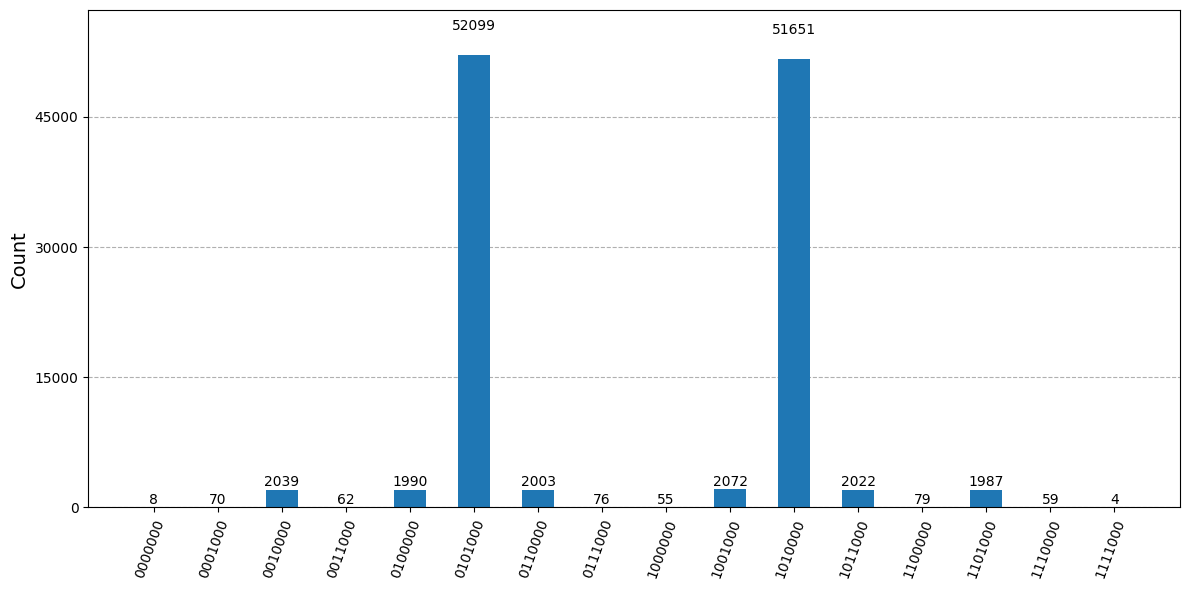

In [18]:
from qiskit.visualization import plot_histogram

N=ancilla_bits
QSVT_qc.measure_all()
sampler = StatevectorSampler()

pub = (QSVT_qc)
job = sampler.run([pub], shots=1000000)

result = job.result()[0]

def filter_dict_by_trailing_zeros(input_dict, N):
    suffix = '0' * (N + 1)
    filtered_dict = {k: v for k, v in input_dict.items() if k.endswith(suffix)}
    return filtered_dict

count_result = result.data.meas.get_counts()
print(filter_dict_by_trailing_zeros(count_result, N))
plot_histogram(filter_dict_by_trailing_zeros(count_result, N), figsize=(12,6))

# QSVT + QPE

C:\Users\jshsy\AppData\Local\Temp\ipykernel_4240\586238307.py:31: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc.compose(QFT(num_ancilla, do_swaps=True).inverse(), range(num_ancilla), inplace=True)


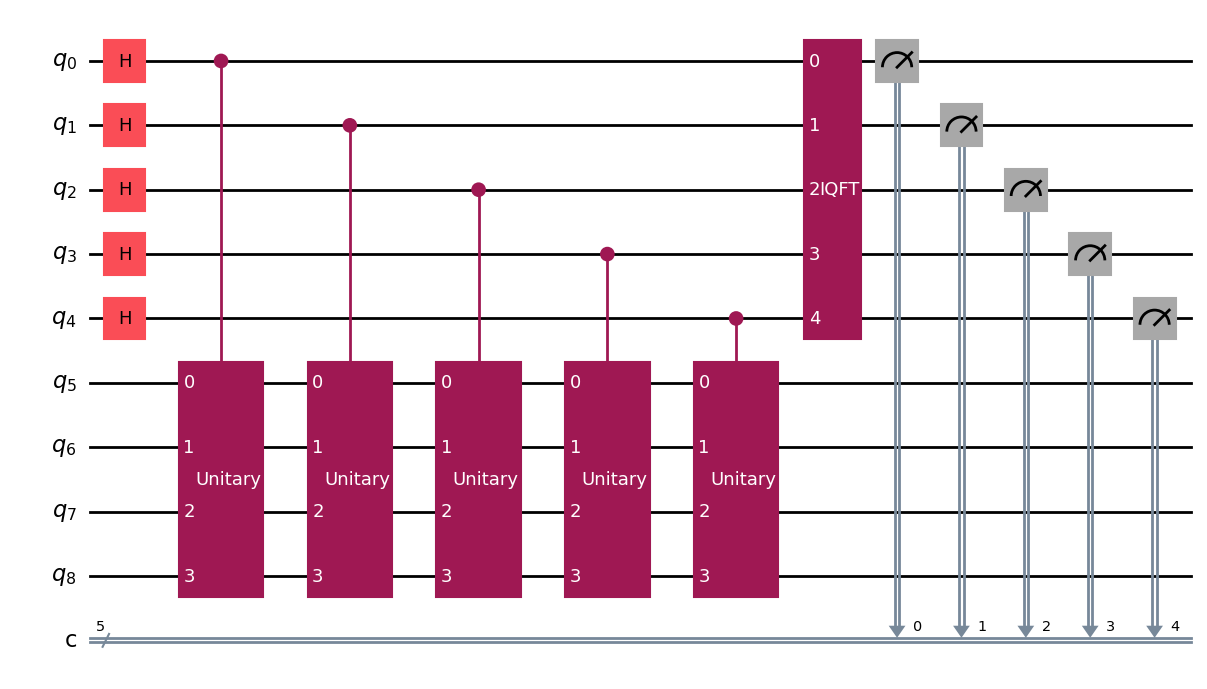

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.linalg import expm
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator, Aer
from qiskit.circuit.library import QFT, UnitaryGate
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from IPython import display
import pandas as pd
from typing import List
from qiskit.circuit import ParameterVector
from qiskit.quantum_info import SparsePauliOp
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Operator

from qiskit.circuit.library import UnitaryGate, QFT


def create_qpe_circuit(num_ancilla: int, U_gate: UnitaryGate, state_prep: QuantumCircuit) -> QuantumCircuit:
    n_target = state_prep.num_qubits
    U_mat = U_gate.to_matrix()
    qc = QuantumCircuit(num_ancilla + n_target, num_ancilla)
    qc.h(range(num_ancilla))
    qc.compose(state_prep, qubits=range(num_ancilla, num_ancilla+n_target), inplace=True)
    for j in range(num_ancilla):
        mat_pow = np.linalg.matrix_power(U_mat, 2**j)
        qc.append(UnitaryGate(mat_pow).control(), [j] + list(range(num_ancilla, num_ancilla+n_target)))
    qc.compose(QFT(num_ancilla, do_swaps=True).inverse(), range(num_ancilla), inplace=True)
    qc.measure(range(num_ancilla), range(num_ancilla))
    return qc



def bit_to_E(bs, t, T):
    phi = int(bs, 2) / 2**t
    if phi >= 0.5:
        phi -= 1.0
    return (2 * np.pi * phi) / T



def visualize_maxcut_solution(graph: nx.Graph, bitstring: str, title="Max-Cut Visualization"):
    color_map = ['lightcoral' if bit == '0' else 'lightblue' for bit in bitstring[::-1]]
    pos = nx.spring_layout(graph, seed=42)
    fig, ax = plt.subplots()
    nx.draw(graph, pos, ax=ax, with_labels=True, node_color=color_map, edge_color='gray')
    ax.set_title(f"{title}\nBitstring: {bitstring}")
    plt.show()



def run_qpe_on_graph(graph: nx.Graph, t: int = 8, shots: int = 4096):
    nq = graph.number_of_nodes()
    H = build_maxcut_hamiltonian(graph)
    
    H_mat = Operator(H).data
    E_bound = graph.number_of_edges()  # normalization
    T = np.pi / E_bound

    state_prep = QuantumCircuit(nq)

    U = expm(1j * T * H_mat)
    U_gate = UnitaryGate(U, label="e^{iTH}")

    qpe = create_qpe_circuit(t, U_gate, state_prep)
    
    return qpe, t, T

qpe_qc, qpe_precision_qubits_num, T = run_qpe_on_graph(G4, 5)
qpe_qc.draw('mpl')

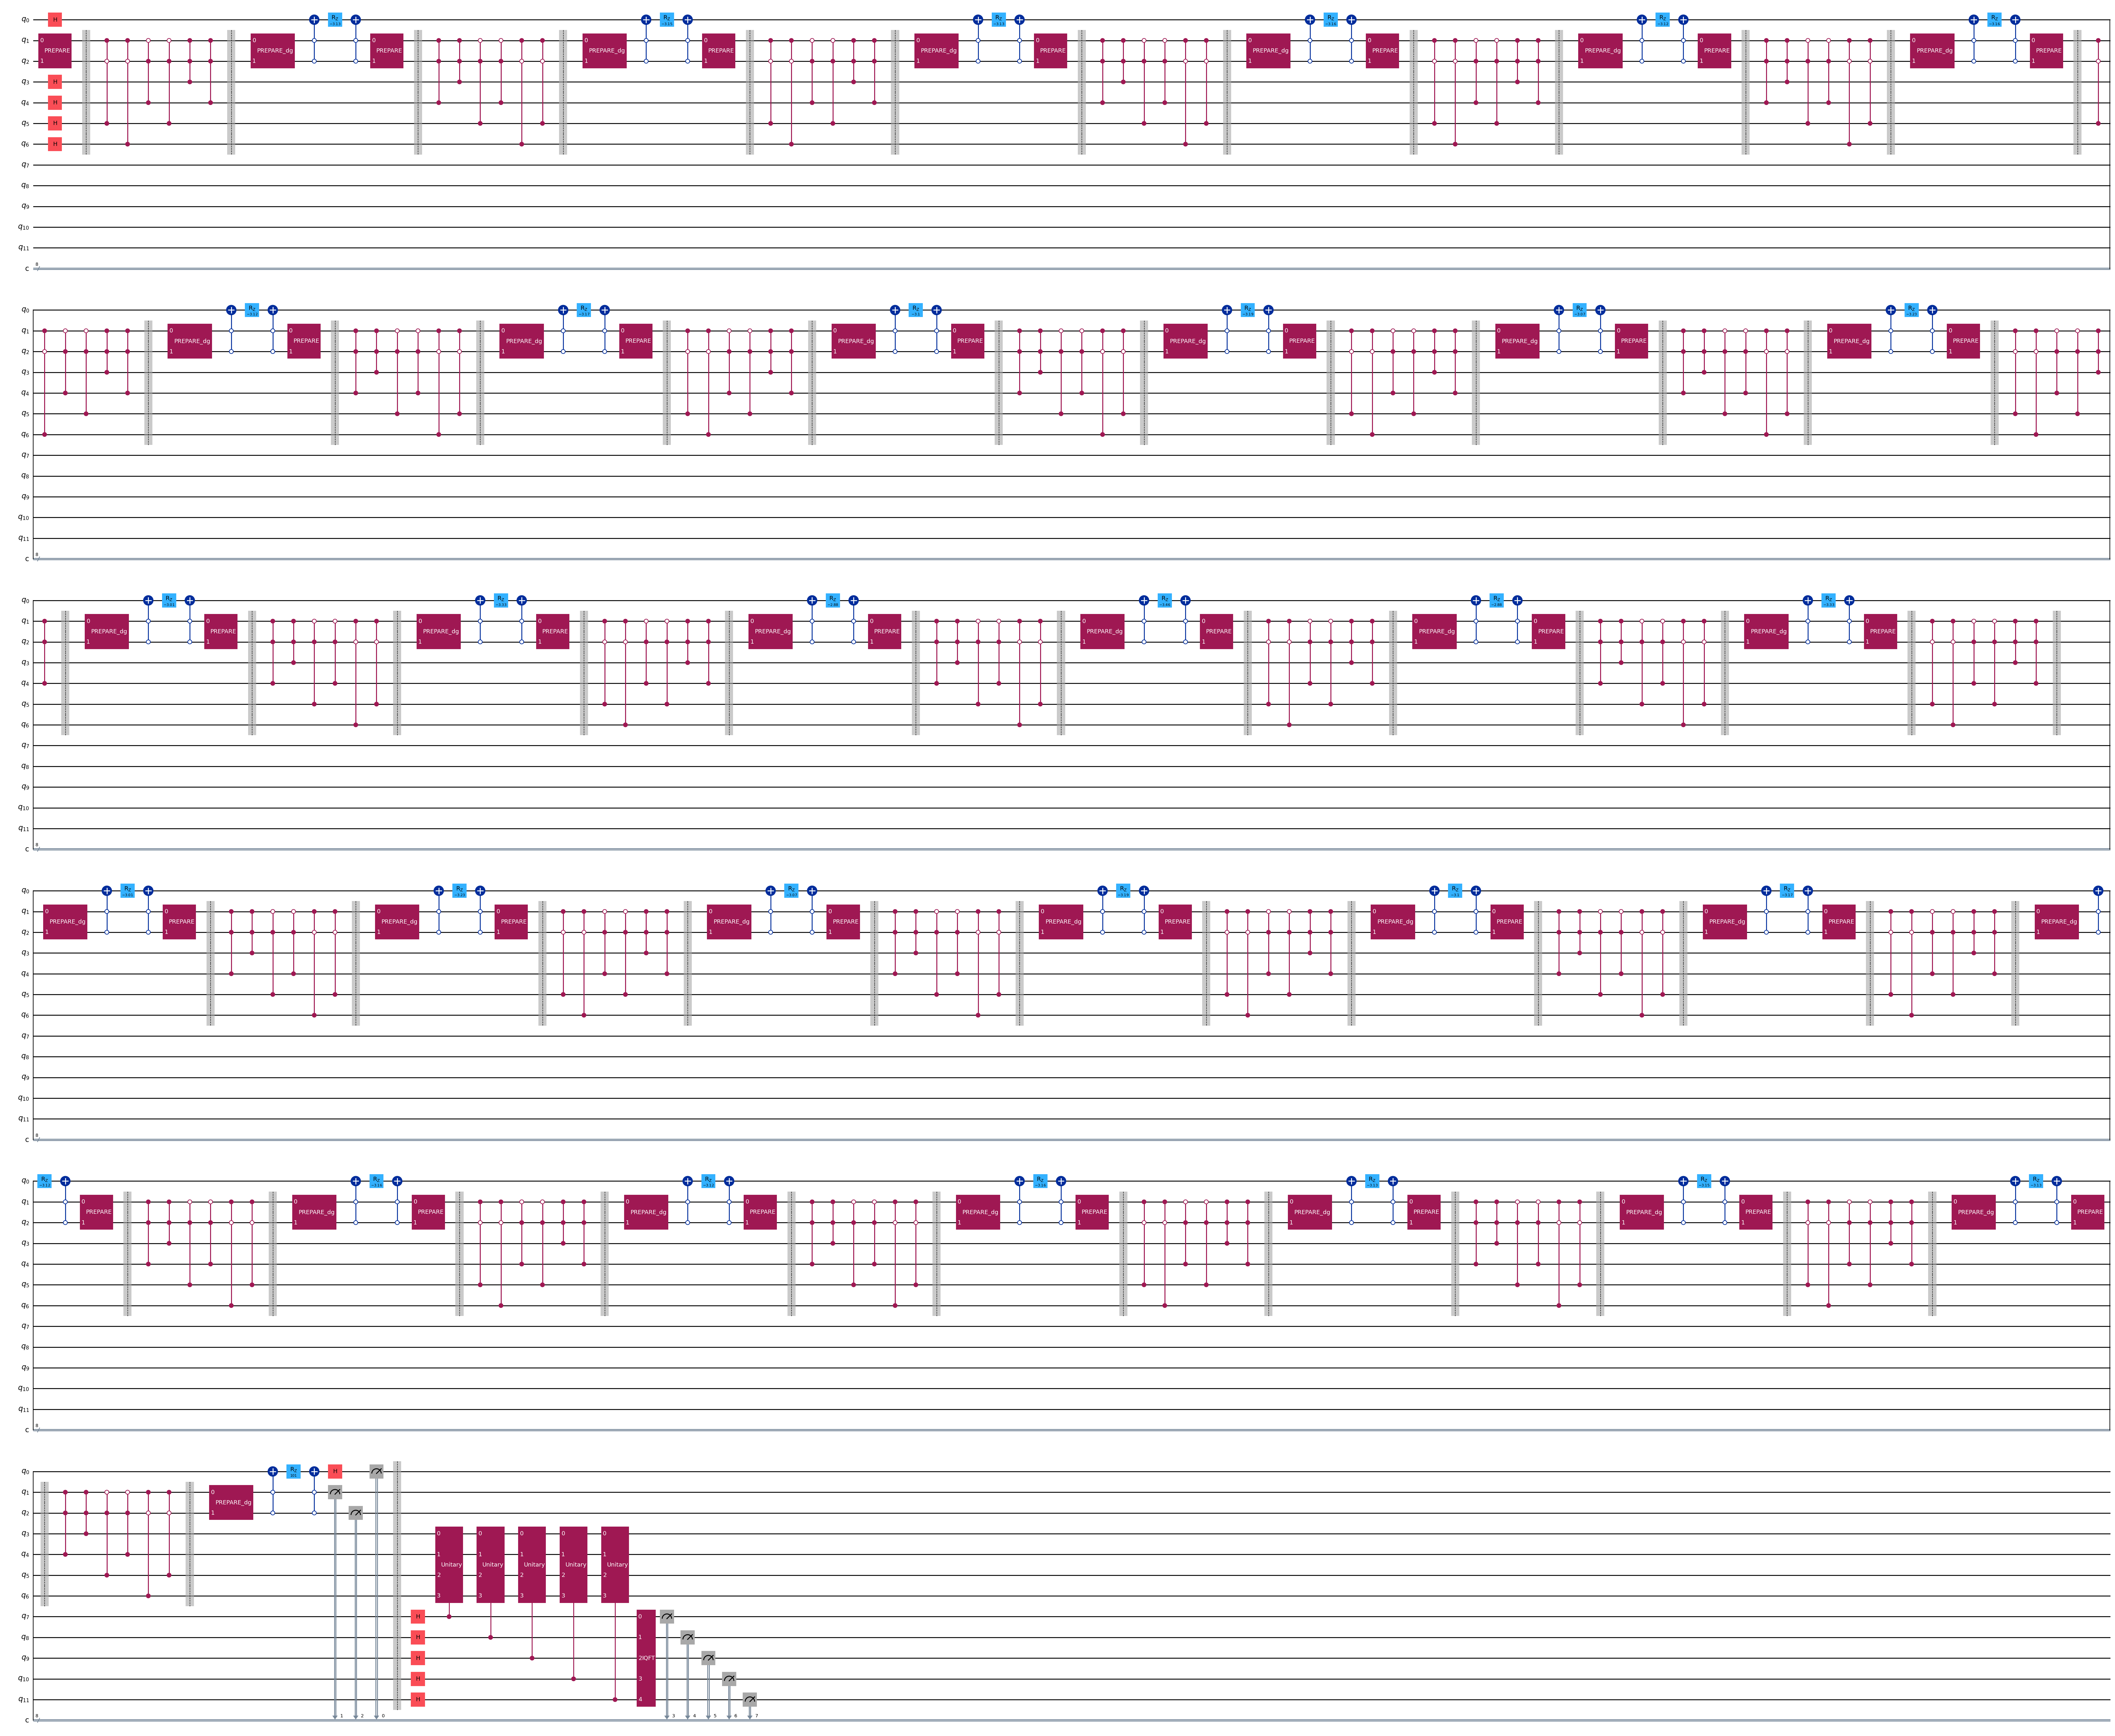

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister

qr = QuantumRegister(QSVT_qc.num_qubits+qpe_precision_qubits_num, name='q')
cr = ClassicalRegister(ancilla_bits+1+qpe_precision_qubits_num, name='c')
qc_QSVT_QPE = QuantumCircuit(qr, cr)

qc_QSVT_QPE.compose(real_QSVT(ancilla_bits, phase_list, qc), qubits=[i for i in range(QSVT_qc.num_qubits)], inplace=True)

qc_QSVT_QPE.measure([qr[i] for i in range(ancilla_bits+1)], [cr[i] for i in range(ancilla_bits+1)])

qc_QSVT_QPE.barrier()
qc_QSVT_QPE.compose(qpe_qc, qubits=[i for i in range(QSVT_qc.num_qubits, QSVT_qc.num_qubits+qpe_precision_qubits_num)]+[i for i in range(ancilla_bits+1, ancilla_bits+1+qpe_qc.num_qubits-qpe_precision_qubits_num)], clbits = [i for i in range(ancilla_bits+1,ancilla_bits+1+qpe_precision_qubits_num)], inplace=True)
qc_QSVT_QPE.draw(output="mpl", idle_wires=False, fold=100)

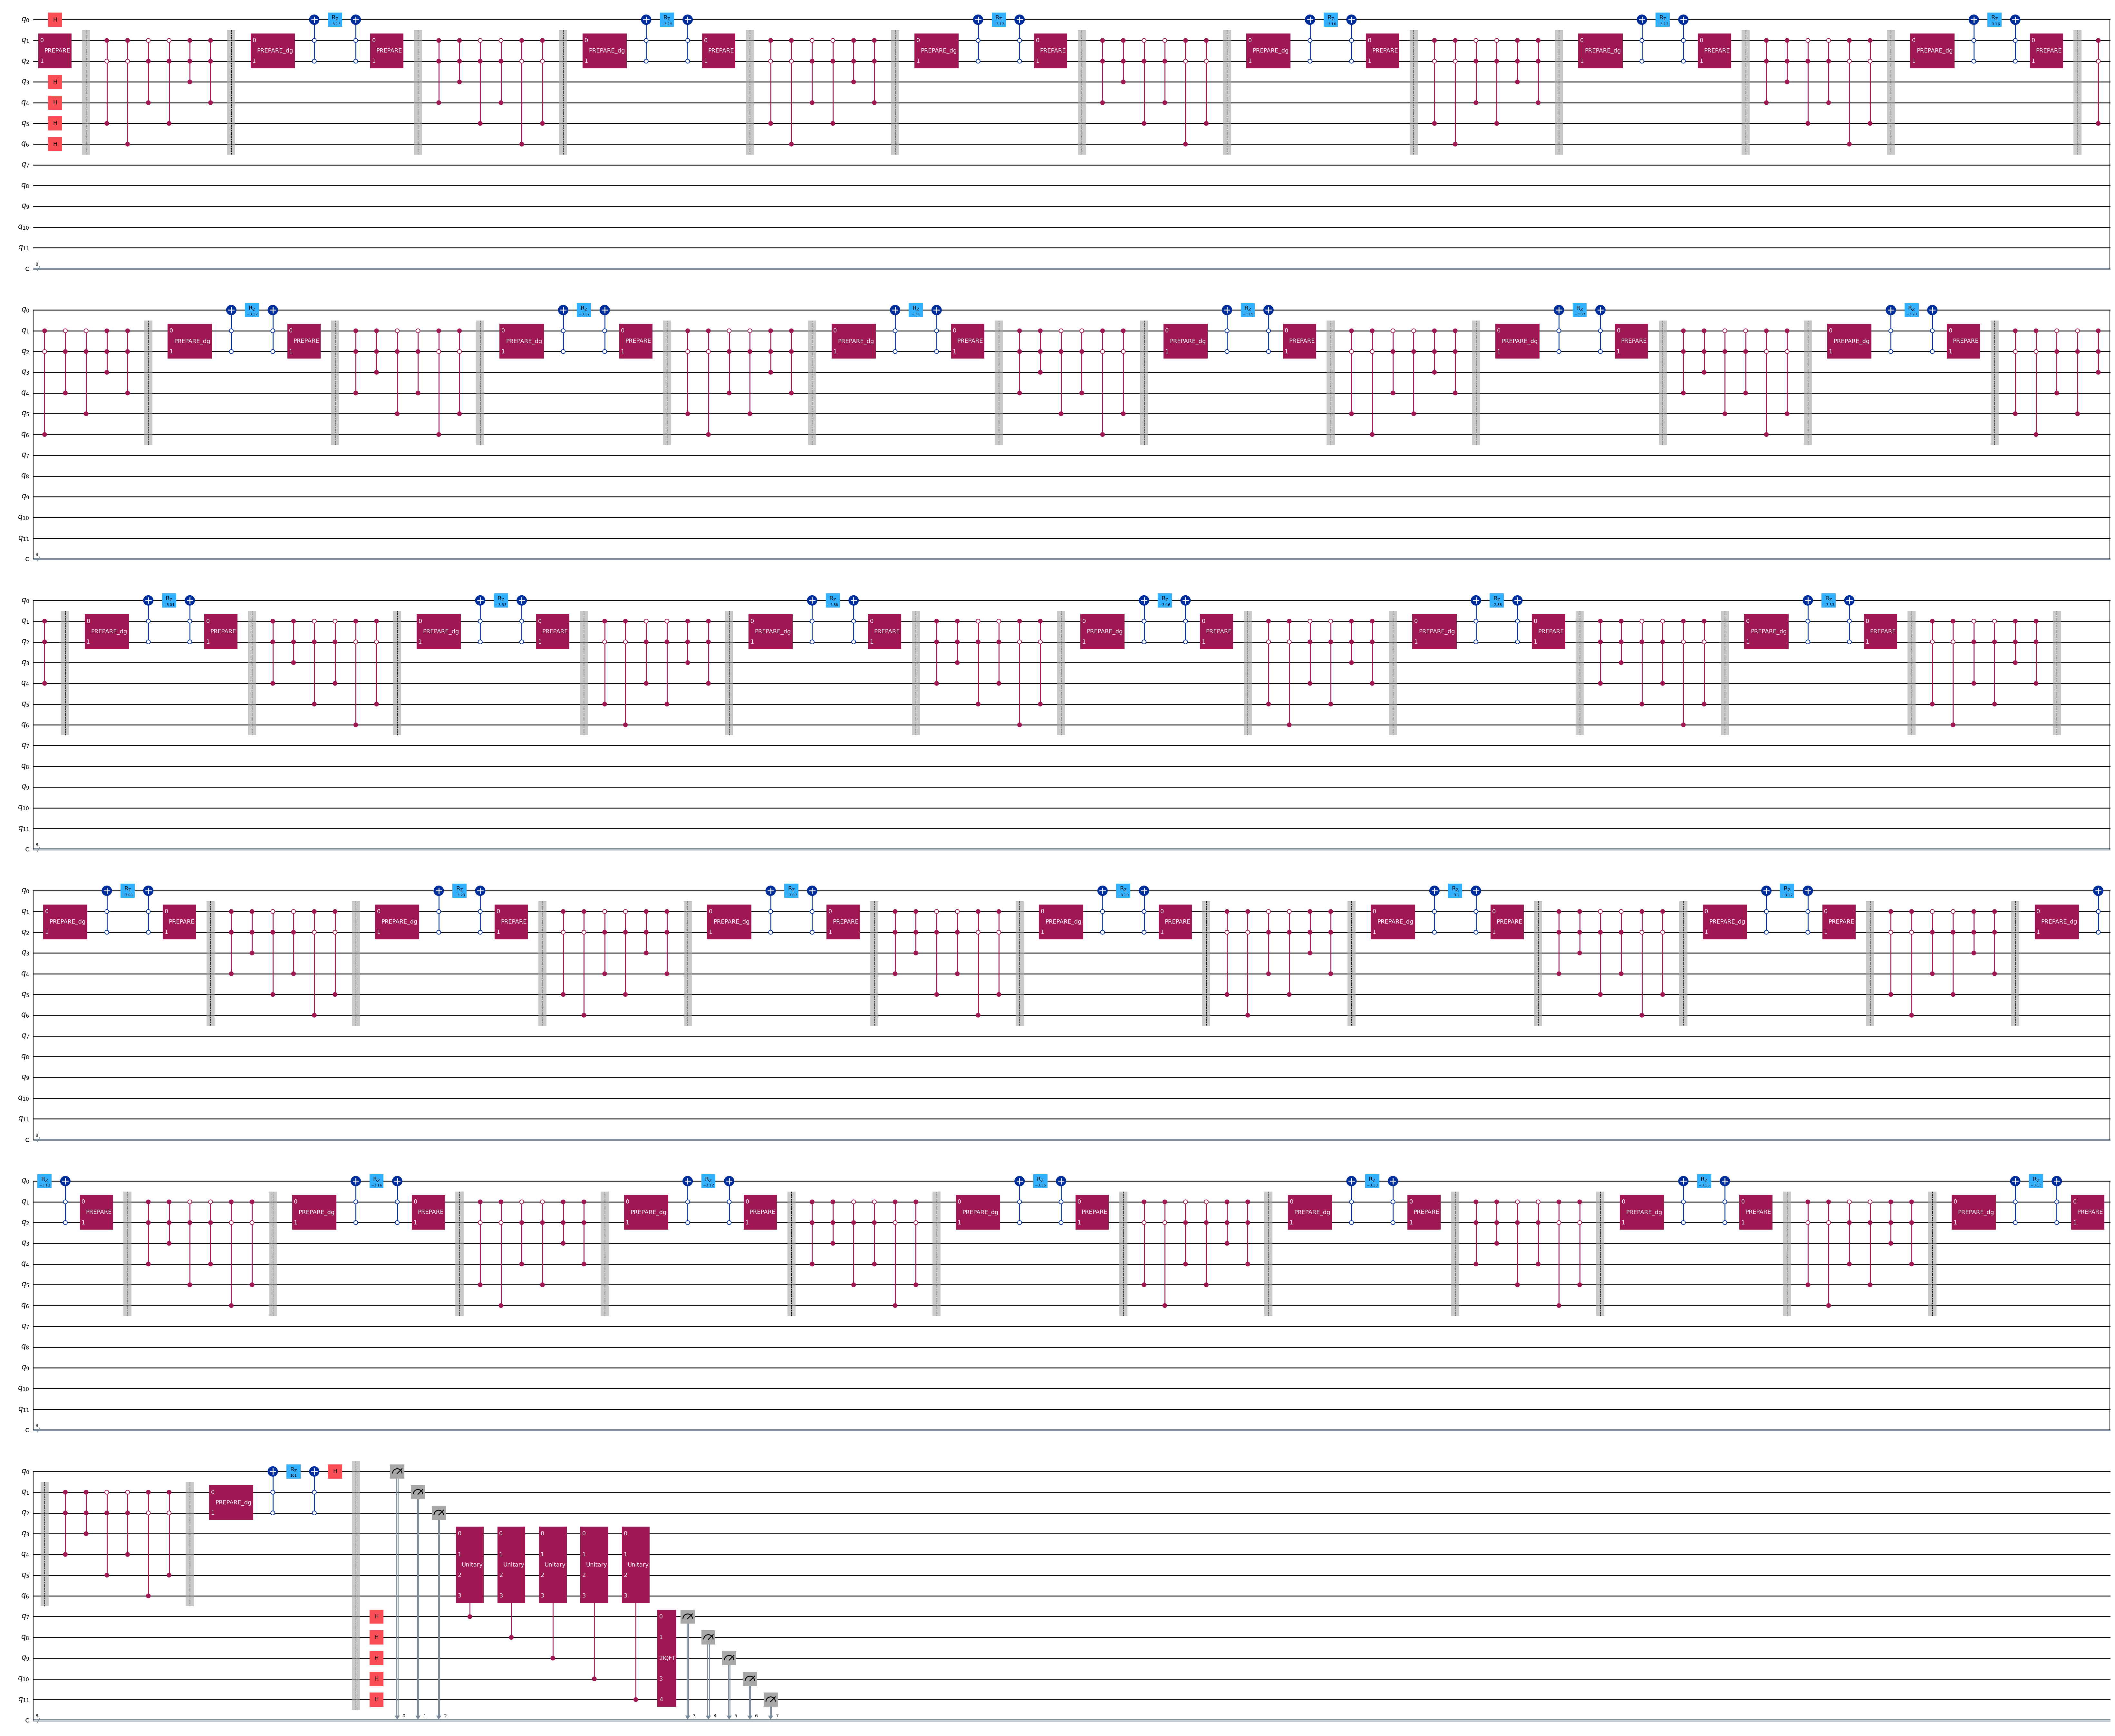

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister

qr = QuantumRegister(QSVT_qc.num_qubits+qpe_precision_qubits_num, name='q')
cr = ClassicalRegister(ancilla_bits+1+qpe_precision_qubits_num, name='c')
qc_QSVT_QPE = QuantumCircuit(qr, cr)

qc_QSVT_QPE.compose(real_QSVT(ancilla_bits, phase_list, qc), qubits=[i for i in range(QSVT_qc.num_qubits)], inplace=True)

qc_QSVT_QPE.barrier()
qc_QSVT_QPE.compose(qpe_qc, qubits=[i for i in range(QSVT_qc.num_qubits, QSVT_qc.num_qubits+qpe_precision_qubits_num)]+[i for i in range(ancilla_bits+1, ancilla_bits+1+qpe_qc.num_qubits-qpe_precision_qubits_num)], clbits = [i for i in range(ancilla_bits+1,ancilla_bits+1+qpe_precision_qubits_num)], inplace=True)
qc_QSVT_QPE.measure([qr[i] for i in range(ancilla_bits+1)], [cr[i] for i in range(ancilla_bits+1)])
qc_QSVT_QPE.draw(output="mpl", idle_wires=False, fold=100)

In [22]:
print(ancilla_bits)

2


{'10000000': 103744, '10110000': 2130, '10101000': 8239, '10100000': 512, '11011000': 303, '01110000': 17, '10111000': 299, '11100000': 37, '11010000': 111, '11000000': 138, '11111000': 21, '10010000': 85, '11101000': 27, '01100000': 9, '11001000': 81, '10011000': 198, '00110000': 9, '10001000': 49, '00001000': 17, '11110000': 24, '01010000': 10, '00000000': 19, '01111000': 16, '01000000': 11, '00011000': 7, '00111000': 8, '01011000': 12, '01101000': 20, '01001000': 3, '00010000': 12, '00101000': 12, '00100000': 6}


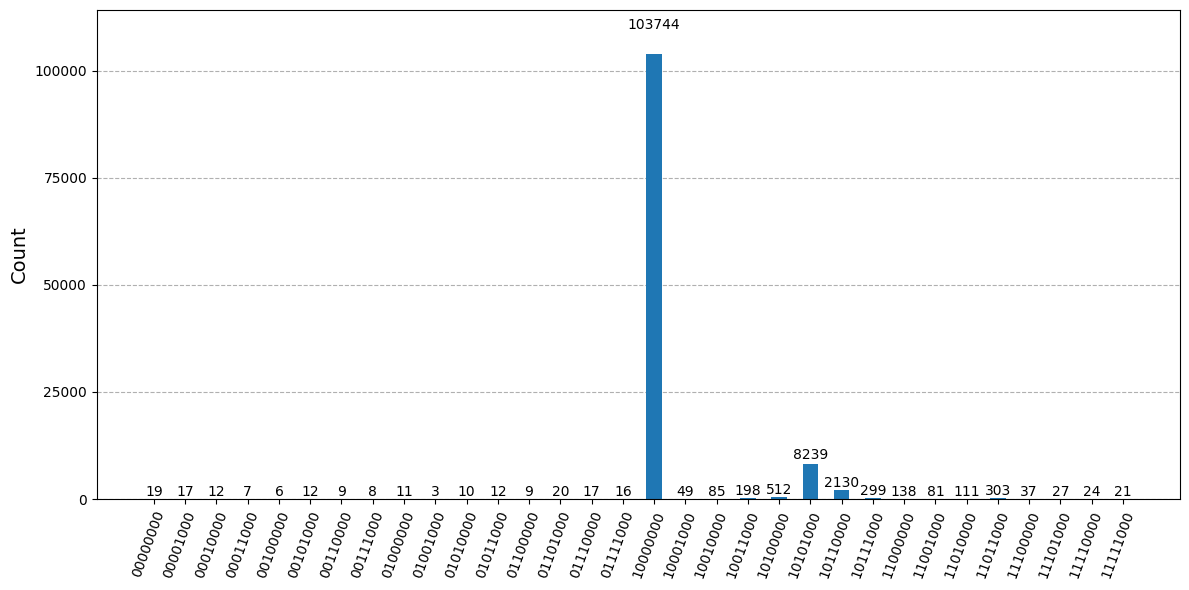

In [23]:
from qiskit.visualization import plot_histogram

N=ancilla_bits
sampler = StatevectorSampler()

pub = (qc_QSVT_QPE)
job = sampler.run([pub], shots=1000000)

result = job.result()[0]

def filter_dict_by_trailing_zeros(input_dict, N):
    suffix = '0' * (N+1)
    filtered_dict = {k: v for k, v in input_dict.items() if k.endswith(suffix)}
    return filtered_dict

count_result = result.data.c.get_counts()
final_result=filter_dict_by_trailing_zeros(count_result, N)
print(final_result)
plot_histogram(final_result, figsize=(12,6))

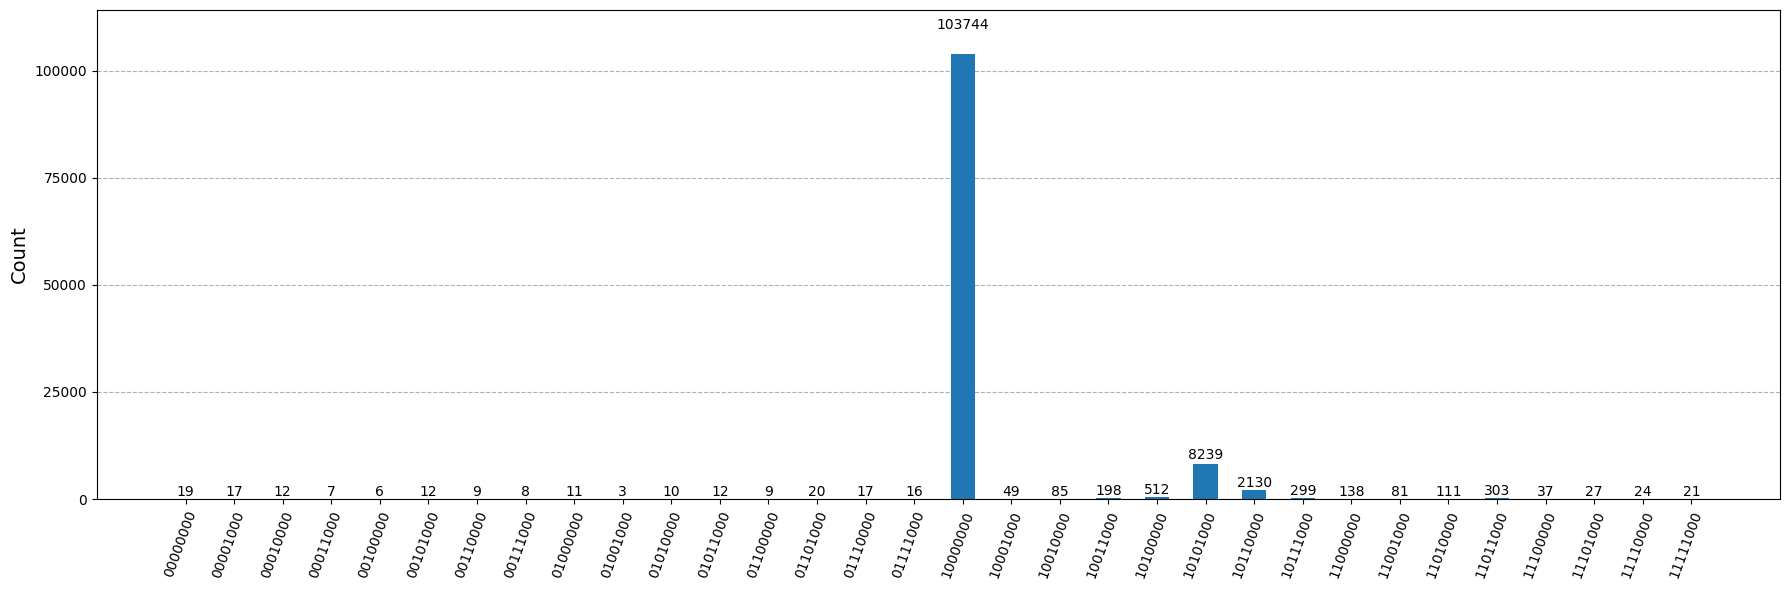

In [24]:
plot_histogram(final_result, figsize=(18, 6))

In [25]:
print("\n=== QPE 결과 (Top-5) ===")
for i, (bs, f) in enumerate(sorted(final_result.items(), key=lambda kv: kv[1], reverse=True)[:10], 1):
    print(f"{i}. bits {bs}  freq {f:4d}  E_QPE ≈ {bit_to_E(bs, len(bs), T):.3f}")


=== QPE 결과 (Top-5) ===
1. bits 10000000  freq 103744  E_QPE ≈ -3.000
2. bits 10101000  freq 8239  E_QPE ≈ -2.062
3. bits 10110000  freq 2130  E_QPE ≈ -1.875
4. bits 10100000  freq  512  E_QPE ≈ -2.250
5. bits 11011000  freq  303  E_QPE ≈ -0.938
6. bits 10111000  freq  299  E_QPE ≈ -1.688
7. bits 10011000  freq  198  E_QPE ≈ -2.438
8. bits 11000000  freq  138  E_QPE ≈ -1.500
9. bits 11010000  freq  111  E_QPE ≈ -1.125
10. bits 10010000  freq   85  E_QPE ≈ -2.625


In [ ]:
from qiskit_aer.noise import (
    NoiseModel, depolarizing_error, pauli_error,
    phase_damping_error, amplitude_damping_error, ReadoutError
)
from qiskit_aer import AerSimulator
from qiskit import transpile

from qiskit_aer.noise import (
    NoiseModel, depolarizing_error, pauli_error,
    phase_damping_error, amplitude_damping_error, ReadoutError
)
from qiskit_aer import AerSimulator
from qiskit import transpile



def filter_dict_by_trailing_zeros(input_dict, N):
    suffix = '0' * (N + 2)
    filtered_dict = {k: v for k, v in input_dict.items() if k.endswith(suffix)}
    return filtered_dict


def make_noise_model(kind: str, p: float) -> NoiseModel:

    nm = NoiseModel()
    if kind == "depolarizing":
        # 1-qubit & 2-qubit 동일 확률
        nm.add_all_qubit_quantum_error(depolarizing_error(p, 1),
                                       ['x','y','z','h','sx','u'])
        nm.add_all_qubit_quantum_error(depolarizing_error(p, 2),
                                       ['cx'])
    elif kind == "phase_damping":
        pd = phase_damping_error(p)
        nm.add_all_qubit_quantum_error(pd,  ['x','y','z','h','sx','u'])
    elif kind == "amplitude_damping":
        ad = amplitude_damping_error(p)
        nm.add_all_qubit_quantum_error(ad,  ['x','y','z','h','sx','u'])
    elif kind == "readout":
        ro = ReadoutError([[1-p, p],
                           [p, 1-p]])
        nm.add_all_qubit_readout_error(ro)
    else:
        raise ValueError(f"Unknown noise type: {kind}")
    return nm


N=2
noise_kinds = ["depolarizing", "phase_damping", "amplitude_damping","readout"]

shots=1000000

12
7
{'00000000': 7087, '11100000': 1040, '10110000': 3822, '10000000': 16180, '11010000': 3600, '11000000': 697, '01010000': 116, '11110000': 225, '10100000': 1147, '01100000': 132, '01110000': 128, '10010000': 339, '01000000': 155, '00010000': 128, '00100000': 142, '00110000': 97}


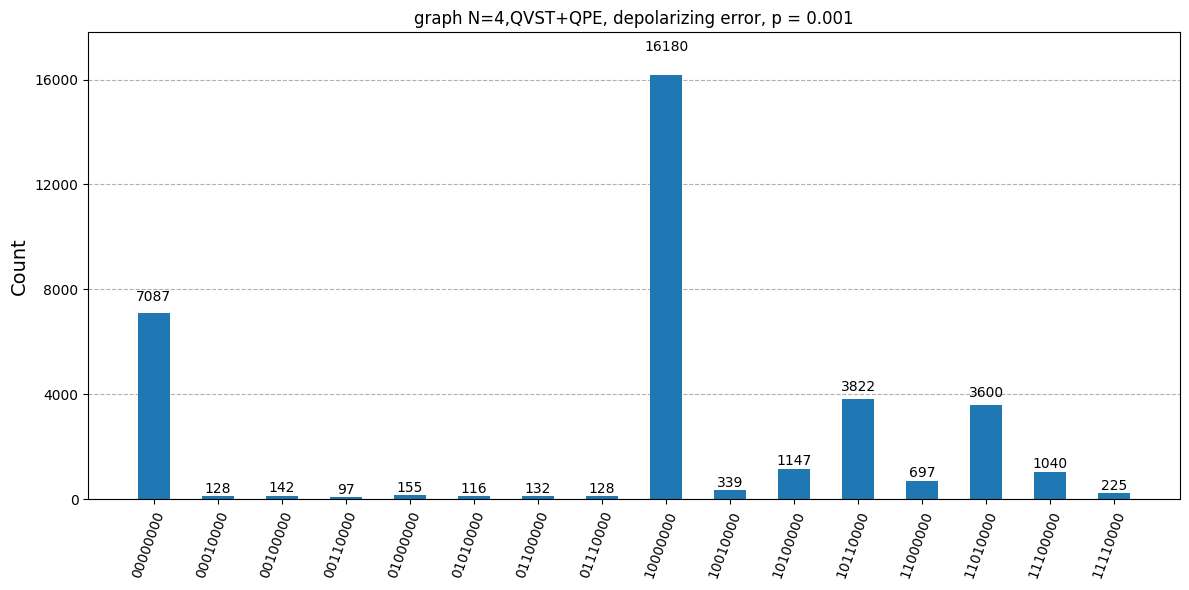

In [39]:
noise_model = make_noise_model("depolarizing", p=0.001)
backend  = AerSimulator(noise_model=noise_model,
                        basis_gates=noise_model.basis_gates
                                         if noise_model else None)                                      
compiled = transpile(qc_QSVT_QPE, backend)
print(qc_QSVT_QPE.num_qubits)
print(QSVT_qc.num_qubits)
counts = backend.run(compiled, shots=shots).result().get_counts()

data = filter_dict_by_trailing_zeros(counts, N)

print(data)
plot_histogram(data, figsize=(12,6), title = 'graph N=4,QVST+QPE, depolarizing error, p = 0.001')

12
7
{'00000000': 1976, '10000000': 80572, '10110000': 2237, '11000000': 241, '11100000': 156, '10100000': 617, '11010000': 567, '10010000': 142, '01010000': 33, '00010000': 34, '01110000': 48, '00100000': 27, '11110000': 43, '01100000': 44, '01000000': 41, '00110000': 13}


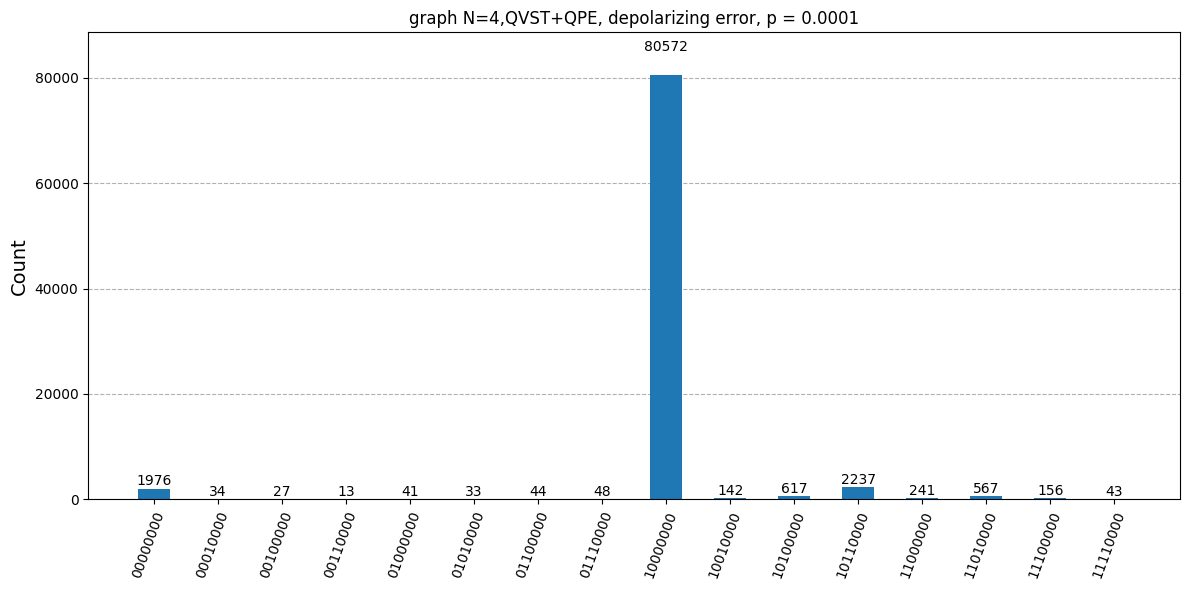

In [38]:
noise_model = make_noise_model("depolarizing", p=0.0001)
backend  = AerSimulator(noise_model=noise_model,
                        basis_gates=noise_model.basis_gates
                                         if noise_model else None)                                      
compiled = transpile(qc_QSVT_QPE, backend)
print(qc_QSVT_QPE.num_qubits)
print(QSVT_qc.num_qubits)
counts = backend.run(compiled, shots=shots).result().get_counts()

data = filter_dict_by_trailing_zeros(counts, N)

print(data)
plot_histogram(data, figsize=(12,6), title = 'graph N=4,QVST+QPE, depolarizing error, p = 0.0001')

12
7
{'00000000': 464, '11100000': 65, '10000000': 9737, '10100000': 234, '10110000': 732, '11000000': 143, '11010000': 194, '11110000': 20, '01010000': 19, '01110000': 53, '10010000': 79, '01000000': 101, '00010000': 13, '01100000': 65, '00110000': 17, '00100000': 20}


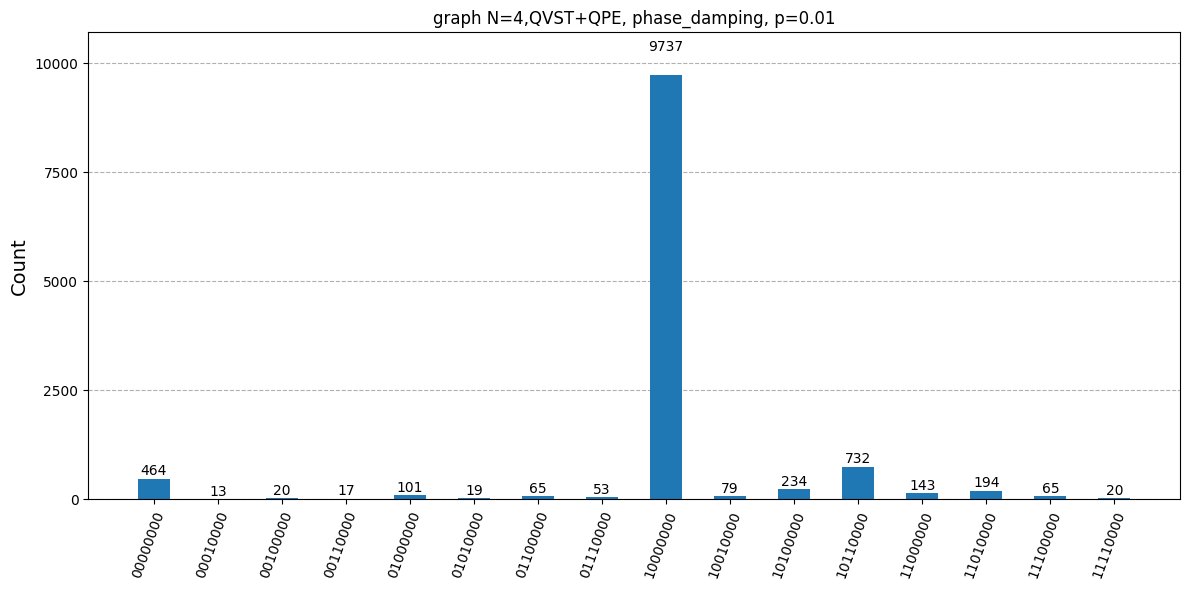

In [46]:
noise_model = make_noise_model("phase_damping", p=0.01)
backend  = AerSimulator(noise_model=noise_model,
                        basis_gates=noise_model.basis_gates
                                         if noise_model else None)                                      
compiled = transpile(qc_QSVT_QPE, backend)
print(qc_QSVT_QPE.num_qubits)
print(QSVT_qc.num_qubits)
counts = backend.run(compiled, shots=shots).result().get_counts()

data = filter_dict_by_trailing_zeros(counts, N)

print(data)
plot_histogram(data, figsize=(12,6), title = 'graph N=4,QVST+QPE, phase_damping, p=0.01')

12
7
{'11100000': 211, '00000000': 1045, '00110000': 111, '10110000': 900, '11000000': 266, '10100000': 314, '01100000': 101, '01000000': 166, '10000000': 2414, '01010000': 76, '11110000': 103, '11010000': 555, '00010000': 68, '01110000': 100, '10010000': 169, '00100000': 79}


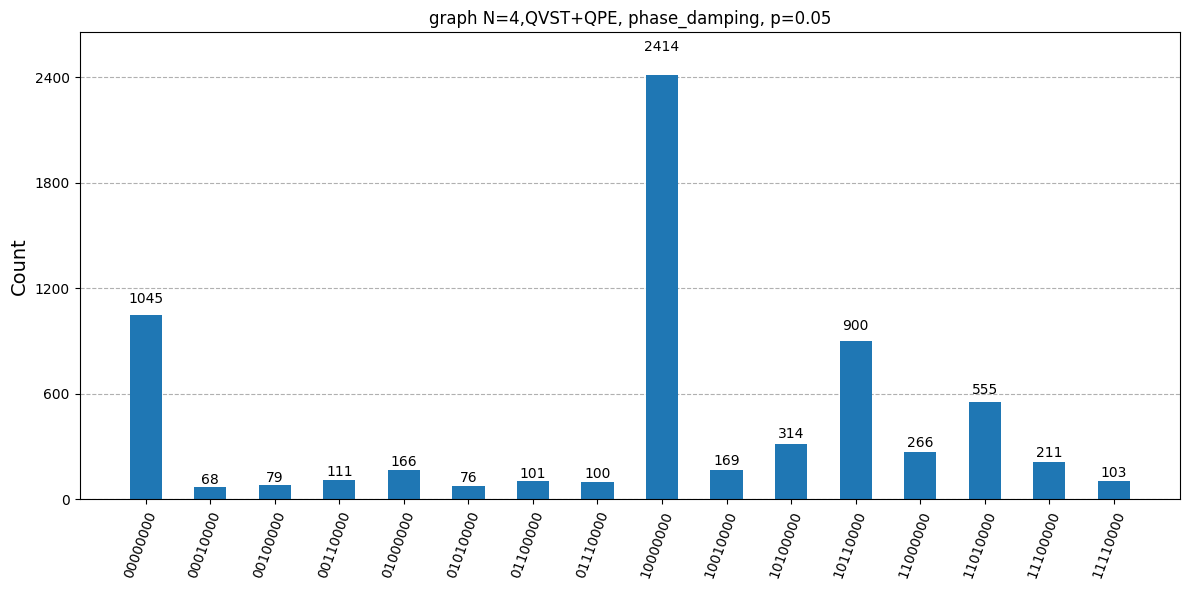

In [45]:
noise_model = make_noise_model("phase_damping", p=0.05)
backend  = AerSimulator(noise_model=noise_model,
                        basis_gates=noise_model.basis_gates
                                         if noise_model else None)                                      
compiled = transpile(qc_QSVT_QPE, backend)
print(qc_QSVT_QPE.num_qubits)
print(QSVT_qc.num_qubits)
counts = backend.run(compiled, shots=shots).result().get_counts()

data = filter_dict_by_trailing_zeros(counts, N)

print(data)
plot_histogram(data, figsize=(12,6), title = 'graph N=4,QVST+QPE, phase_damping, p=0.05')

12
7
{'00000000': 1437, '10000000': 95072, '11000000': 174, '11100000': 105, '10110000': 2145, '11010000': 365, '10100000': 579, '10010000': 112, '01010000': 20, '11110000': 34, '00010000': 20, '01110000': 36, '01100000': 19, '01000000': 21, '00100000': 8, '00110000': 10}


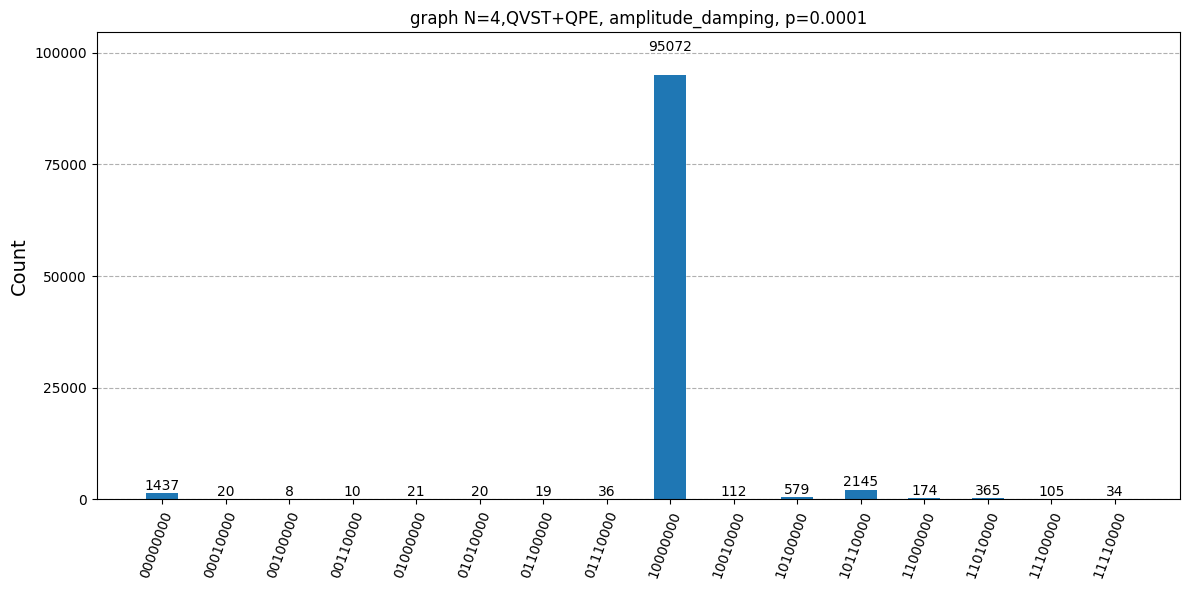

In [47]:
noise_model = make_noise_model("amplitude_damping", p=0.0001)
backend  = AerSimulator(noise_model=noise_model,
                        basis_gates=noise_model.basis_gates
                                         if noise_model else None)                                      
compiled = transpile(qc_QSVT_QPE, backend)
print(qc_QSVT_QPE.num_qubits)
print(QSVT_qc.num_qubits)
counts = backend.run(compiled, shots=shots).result().get_counts()

data = filter_dict_by_trailing_zeros(counts, N)

print(data)
plot_histogram(data, figsize=(12,6), title = 'graph N=4,QVST+QPE, amplitude_damping, p=0.0001')

12
7
{'11100000': 631, '11000000': 360, '00000000': 7771, '10000000': 46314, '01000000': 62, '10110000': 3018, '10010000': 182, '11010000': 2253, '11110000': 96, '01010000': 44, '10100000': 870, '00110000': 35, '00010000': 52, '01110000': 62, '00100000': 63, '01100000': 68}


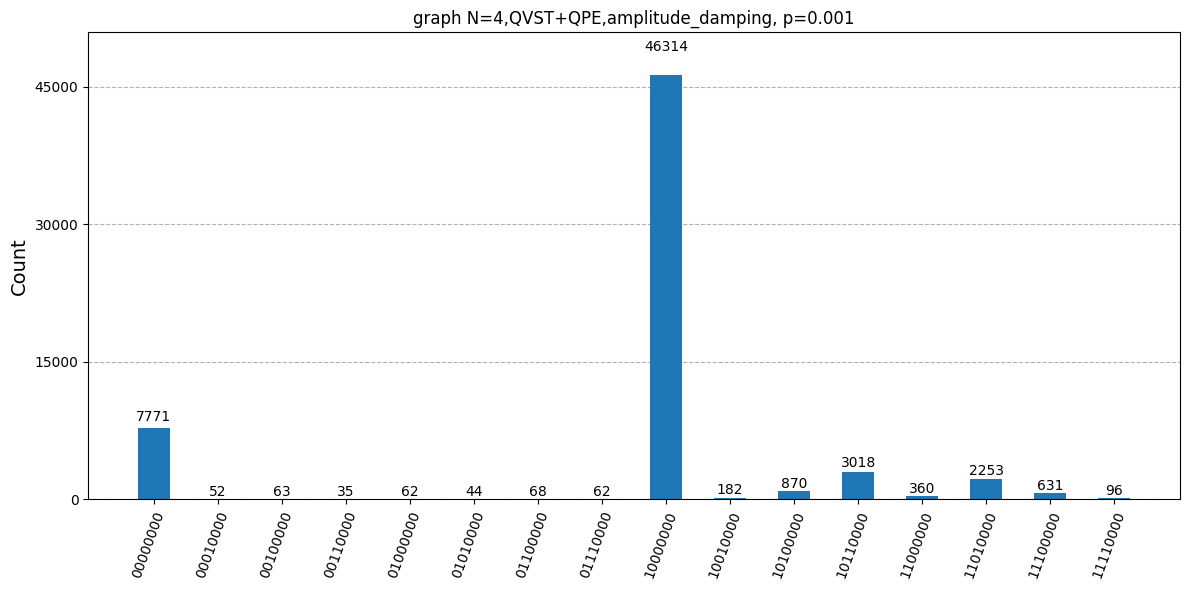

In [48]:
noise_model = make_noise_model("amplitude_damping", p=0.001)
backend  = AerSimulator(noise_model=noise_model,
                        basis_gates=noise_model.basis_gates
                                         if noise_model else None)                                      
compiled = transpile(qc_QSVT_QPE, backend)
print(qc_QSVT_QPE.num_qubits)
print(QSVT_qc.num_qubits)
counts = backend.run(compiled, shots=shots).result().get_counts()

data = filter_dict_by_trailing_zeros(counts, N)

print(data)
plot_histogram(data, figsize=(12,6), title = 'graph N=4,QVST+QPE,amplitude_damping, p=0.001')

12
7
{'10100000': 5974, '00010000': 1317, '11100000': 806, '10000000': 46479, '00000000': 11016, '11000000': 5346, '10010000': 5436, '00110000': 287, '10110000': 1863, '11010000': 1144, '00100000': 1372, '01010000': 226, '01000000': 1261, '01100000': 174, '01110000': 58, '11110000': 278}


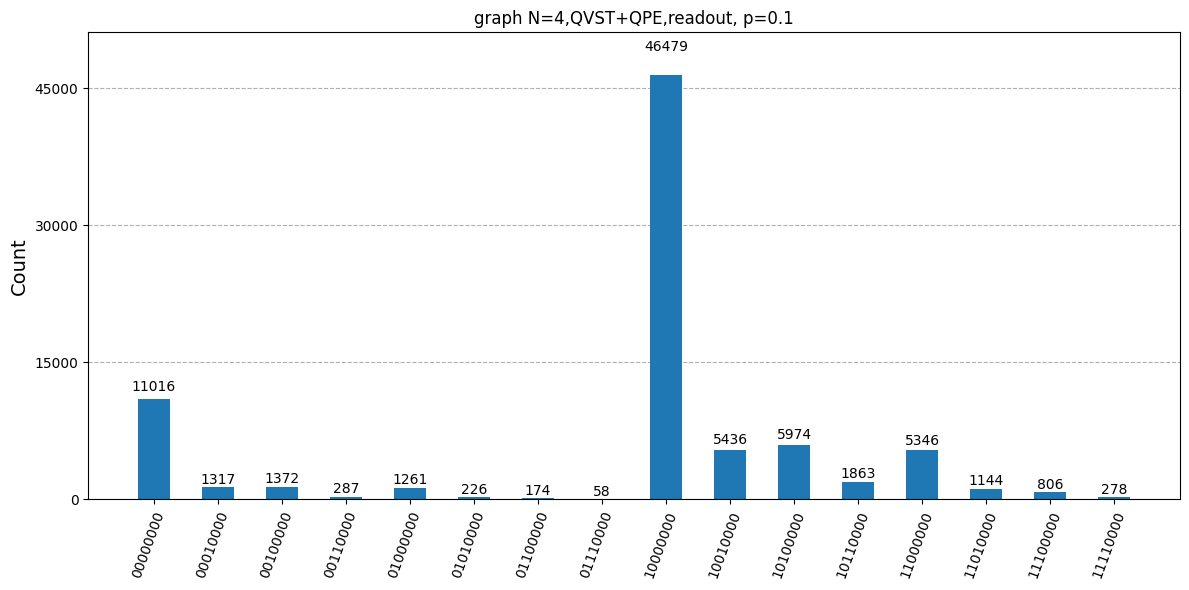

In [49]:
noise_model = make_noise_model("readout", p=0.1)
backend  = AerSimulator(noise_model=noise_model,
                        basis_gates=noise_model.basis_gates
                                         if noise_model else None)                                      
compiled = transpile(qc_QSVT_QPE, backend)
print(qc_QSVT_QPE.num_qubits)
print(QSVT_qc.num_qubits)
counts = backend.run(compiled, shots=shots).result().get_counts()

data = filter_dict_by_trailing_zeros(counts, N)

print(data)
plot_histogram(data, figsize=(12,6), title = 'graph N=4,QVST+QPE,readout, p=0.1')

12
7
{'10000000': 95695, '00000000': 2047, '11100000': 51, '11010000': 141, '10100000': 1550, '11000000': 1155, '10110000': 1950, '10010000': 1135, '00010000': 24, '01110000': 22, '01000000': 35, '01010000': 7, '11110000': 42, '00110000': 30, '00100000': 31, '01100000': 16}


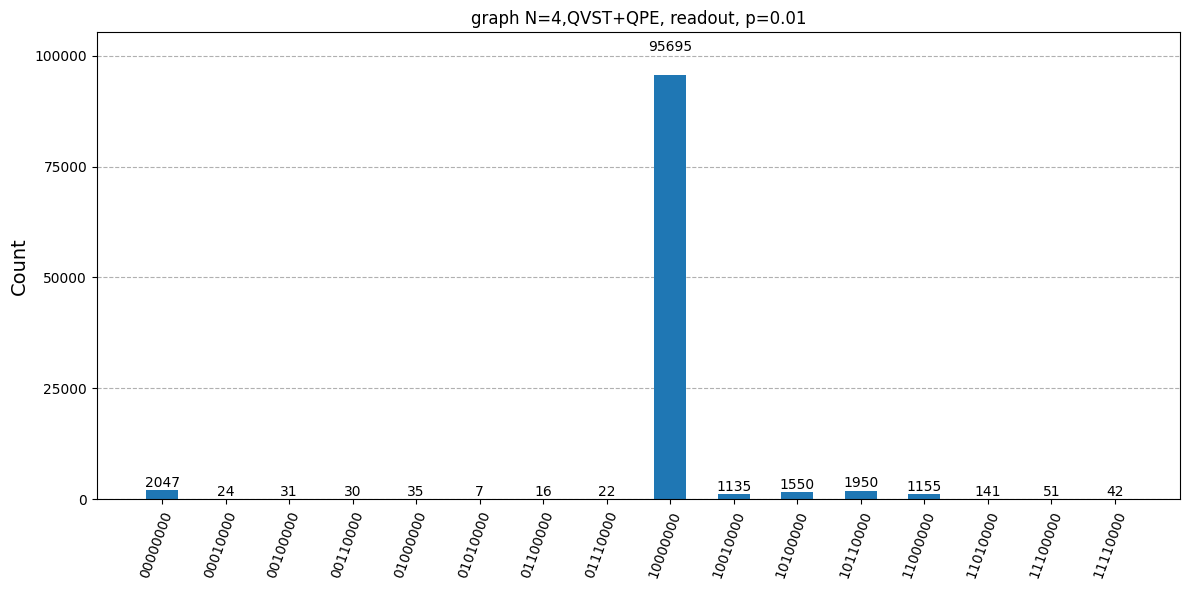

In [50]:
noise_model = make_noise_model("readout", p=0.01)
backend  = AerSimulator(noise_model=noise_model,
                        basis_gates=noise_model.basis_gates
                                         if noise_model else None)                                      
compiled = transpile(qc_QSVT_QPE, backend)
print(qc_QSVT_QPE.num_qubits)
print(QSVT_qc.num_qubits)
counts = backend.run(compiled, shots=shots).result().get_counts()

data = filter_dict_by_trailing_zeros(counts, N)

print(data)
plot_histogram(data, figsize=(12,6), title = 'graph N=4,QVST+QPE, readout, p=0.01')